# Inspect ZTF light curves
Obtained from https://irsa.ipac.caltech.edu/Missions/ztf.html

In [1]:
%matplotlib widget
from astropy.table import Table
import matplotlib.pyplot as plt
from vasca.utils import get_var_stat, mag2flux, flux2mag_np, mag2flux_np,mjd2yr, yr2mjd
import colored
from matplotlib.ticker import ScalarFormatter
from astropy import units as uu
import vasca.visualization as vvis

plt_errorbar_kwargs = {
    "markersize": 6,
    "alpha": 0.6,
    "capsize": 0,
    "lw": 0.2,
    "linestyle": "None", #"dotted",
    "elinewidth": 0.7,
}
label_da = "WD_J004917.14_zg"
label_dh = "WD J221828.58_zg"
ztf_files = {"WD_J004917.14_zr":"lc_ZTF_zr_oid246205400001551_1UVA_J04917.1-252556.5.fits",
             "WD_J004917.14_zg":"lc_ZTF_zg_oid246105400000920_1UVA_J04917.1-252556.5.fits",
             "WD J221828.58_zi":"lc_ZTF_zi_oid443314400002395_1UVA_J221828.6-00012.0.fits",
             "WD J221828.58_zr":"lc_ZTF_zr_oid443214400002235_1UVA_J221828.6-00012.0.fits",
             "WD J221828.58_zg":"lc_ZTF_zg_oid443114400001185_1UVA_J221828.6-00012.0.fits"}


ZTF_file_name = "./resources/ZTF/"+ztf_files[label_da]
tt_lc_da = Table.read(ZTF_file_name)
flux,flux_err = mag2flux(tt_lc_da["mag"], tt_lc_da["magerr"])
tt_lc_da["flux"] = flux
tt_lc_da["flux_err"] = flux_err
sel_da = tt_lc_da["catflags"]==0
tt_lc_da["sel"]=sel_da
tt_lc_da["time"]=tt_lc_da["mjd"]
tt_lc_da["time_bin_size"]=30*uu.second
tt_lc_da["obs_filter"]="ZTF"



ZTF_file_name = "./resources/ZTF/"+ztf_files[label_dh]  #"./resources/ZTF/lc_ZTF_1UVA_J04917.1-252556.5.fits" #
tt_lc_dh = Table.read(ZTF_file_name)
flux,flux_err = mag2flux(tt_lc_dh["mag"], tt_lc_dh["magerr"])
tt_lc_dh["flux"] = flux
tt_lc_dh["flux_err"] = flux_err
sel_dh = tt_lc_dh["catflags"]==0
tt_lc_dh["sel"]=sel_dh
tt_lc_dh["time"]=tt_lc_dh["mjd"]
tt_lc_dh["time_bin_size"]=30*uu.second
tt_lc_dh["obs_filter"]="ZTF"

formatter = ScalarFormatter()
formatter.set_scientific(False)
display(tt_lc_da )

oid,expid,hjd,mjd,mag,magerr,catflags,filtercode,ra,dec,chi,sharp,filefracday,field,ccdid,qid,limitmag,magzp,magzprms,clrcoeff,clrcounc,exptime,airmass,programid,flux,flux_err,sel,time,time_bin_size,obs_filter
,,d,d,mag,mag,,,deg,deg,,,,,,,mag,mag,mag,,,s,,,1e-06 Jy,1e-06 Jy,,d,s,
int64,int32,float64,float64,float32,float32,int32,bytes2,float64,float64,float32,float32,int64,int32,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,bool,float64,float64,str3
246105400000920,57943870,2458333.9422293035,58333.4387037,19.095455,0.08511476,0,zg,12.3215811,-25.4324836,0.663,0.028,20180803438102,246,5,4,19.72,25.913898,0.03981232,-0.010753003,0.00012991737,30.0,2.003,1,83.52526,6.8114014,True,58333.4387037,30.0,ZTF
246105400000920,58248174,2458336.9854677045,58336.4817477,19.06724,0.08343731,0,zg,12.3215379,-25.4325032,0.848,-0.07,20180806481227,246,5,4,20.9,26.109156,0.0303482,-0.093506254,4.6296933e-05,30.0,1.904,1,85.724335,6.8475037,True,58336.4817477,30.0,ZTF
246105400000920,58841756,2458342.9216413633,58342.4175694,19.040741,0.0818901,0,zg,12.3215708,-25.4325227,1.106,0.045,20180812417500,246,5,4,20.77,25.764402,0.03650591,-0.015654918,6.834718e-05,30.0,2.0,1,87.84231,6.881592,True,58342.4175694,30.0,ZTF
246105400000920,59141718,2458345.921422616,58345.4171875,19.019026,0.08064252,0,zg,12.321547,-25.4325573,0.628,-0.046,20180815417176,246,5,4,20.74,25.857712,0.034232974,-0.021141488,6.077307e-05,30.0,1.972,1,89.616875,6.9096985,True,58345.4171875,30.0,ZTF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246105400000920,248133590,2460235.8407164398,60235.3359028,18.965216,0.077629276,0,zg,12.3215325,-25.4325783,0.798,0.044,20231018335891,246,5,4,20.97,26.149439,0.035644293,-0.07968148,6.137386e-05,30.0,2.052,1,94.17026,6.979622,True,60235.3359028,30.0,ZTF
246105400000920,248325075,2460237.7554924027,60237.2507523,18.92976,0.07570428,0,zg,12.3215775,-25.4325876,0.702,0.024,20231020250544,246,5,4,20.85,26.080597,0.034389038,-0.07218234,6.058198e-05,30.0,1.865,1,97.29619,7.0262756,True,60237.2507523,30.0,ZTF
246105400000920,248527613,2460239.780791163,60239.2761343,18.894817,0.07385358,0,zg,12.3215384,-25.43261,0.743,-0.006,20231022275972,246,5,4,21.09,26.164669,0.03926961,-0.05221758,7.565984e-05,30.0,1.853,1,100.47844,7.0726547,True,60239.2761343,30.0,ZTF


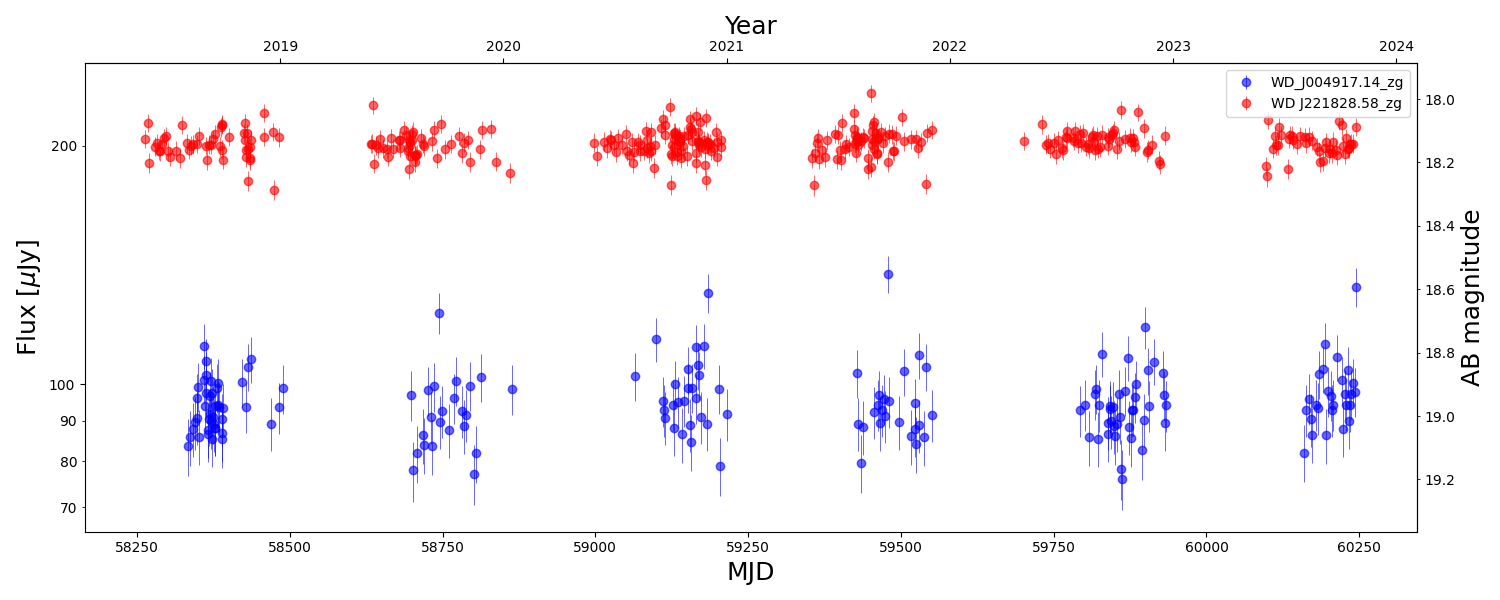

1UVA_J04917.1-252556.5 - RA: 12.321346896575122 deg Dec:-25.432354111852234 deg :
 {'wght_mean': 94.469604, 'wght_mean_err': 0.5160436275981252, 'var': 88.242836, 'nxv': 0.0044188933, 'rchiq': 1.7285082471239699, 'cpval': 3.809795758948414e-09}

1UVA_J221828.6-00012.0 - RA: 334.6190008630954 deg Dec:-0.00334150877900888 deg :
 {'wght_mean': 201.39754, 'wght_mean_err': 0.29292317147619223, 'var': 55.350204, 'nxv': 0.0006195005, 'rchiq': 1.832584391971599, 'cpval': 1.8240194231725183e-19}


In [2]:
fig, ax = plt.subplots(1,1,figsize=(15, 6), clear=True)
fig.set_tight_layout(True)

ax.errorbar(tt_lc_da["mjd"][sel_da],tt_lc_da["flux"][sel_da],yerr=tt_lc_da["flux_err"][sel_da], marker="o",color="b",**plt_errorbar_kwargs, label=label_da)
ax.errorbar(tt_lc_dh["mjd"][sel_dh],tt_lc_dh["flux"][sel_dh],yerr=tt_lc_dh["flux_err"][sel_dh], marker="o",color="r",**plt_errorbar_kwargs, label =label_dh )
ax.set_xlabel("MJD", fontsize=18)
ax.set_ylabel(r"Flux [$\mu$Jy]", fontsize=18)
ax.set_yscale("log")
plt.legend()

ax.yaxis.set_minor_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
secay = ax.secondary_yaxis("right", functions=(flux2mag_np, mag2flux_np))
secay.yaxis.set_minor_formatter(formatter)
secay.set_ylabel("AB magnitude", fontsize=18)

secax = ax.secondary_xaxis("top", functions=(mjd2yr, yr2mjd))
secax.ticklabel_format(useOffset=False, style='plain')
secax.set_xlabel("Year", fontsize=18)

plt.show()

dd_res_da = get_var_stat(tt_lc_da["flux"][sel_da],tt_lc_da["flux_err"][sel_da])
print(colored.fg("blue") +"1UVA_J04917.1-252556.5 - RA: 12.321346896575122 deg Dec:-25.432354111852234 deg :\n",dd_res_da)
dd_res_dh = get_var_stat(tt_lc_dh["flux"][sel_dh],tt_lc_dh["flux_err"][sel_dh])
print(colored.fg("red") +"\n1UVA_J221828.6-00012.0 - RA: 334.6190008630954 deg Dec:-0.00334150877900888 deg :\n",dd_res_dh)

In [3]:
import numpy as np
print(np.sqrt(0.0044),np.sqrt(0.0006195005))

0.066332495807108 0.024889766973597804


In [4]:
1/365

0.0027397260273972603

DA:


/home/buehler/Code/vasca/vasca/visualization.py:1202: RuntimeWarning: divide by zero encountered in divide
  dfs = 1 / dtimes.flatten()


DH:


/home/buehler/Code/vasca/vasca/utils.py:358: RuntimeWarning: divide by zero encountered in divide
  return 1 / pp


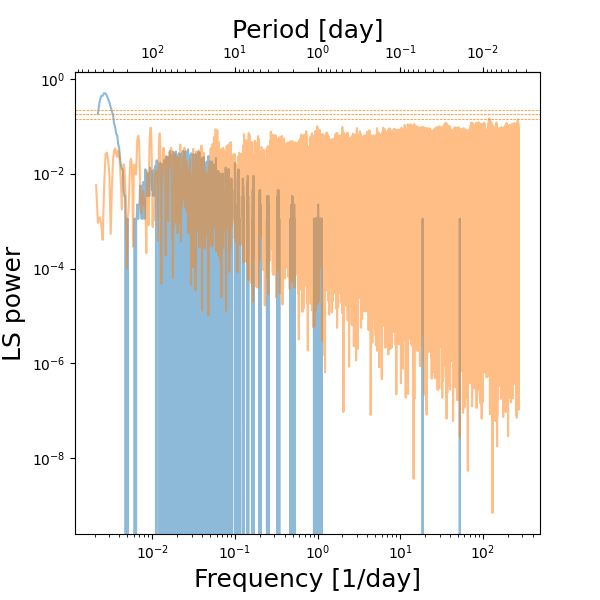

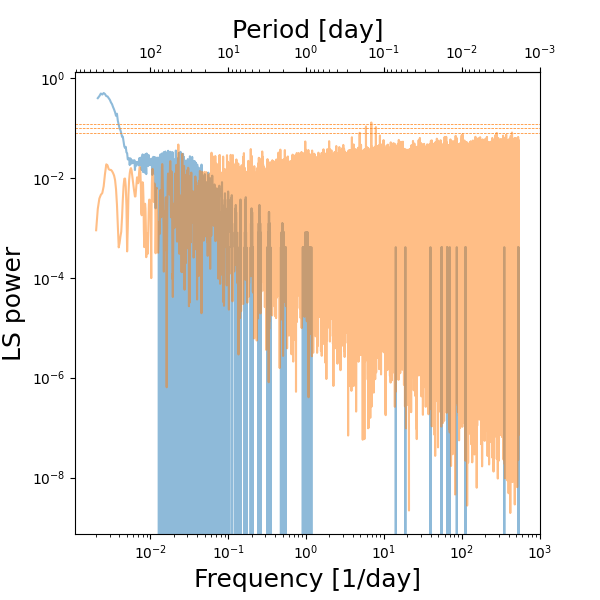

In [5]:
print("DA:")
_ =vvis.plot_lombscargle(tt_lc_da,obs_filter="ZTF",freq_range = None,logy=True)
print("DH:")
_ =vvis.plot_lombscargle(tt_lc_dh,obs_filter="ZTF",freq_range = None,logy=True)